In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t

import pylab
from pylab import legend, plot, show ,title, xlabel, ylabel

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isna().sum()   #no null values present in the dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

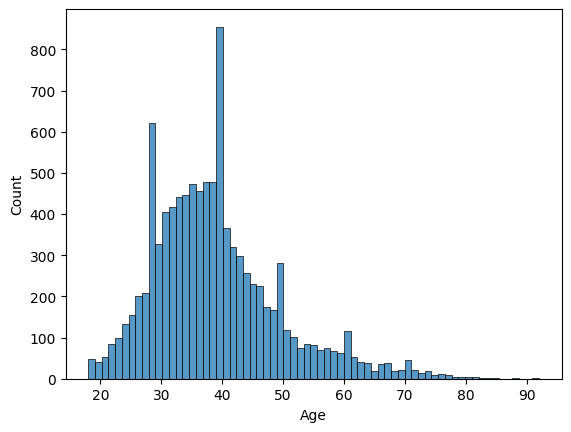

In [7]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.duplicated().sum()   #No duplicate values in the dataset

<Axes: xlabel='Age', ylabel='Count'>

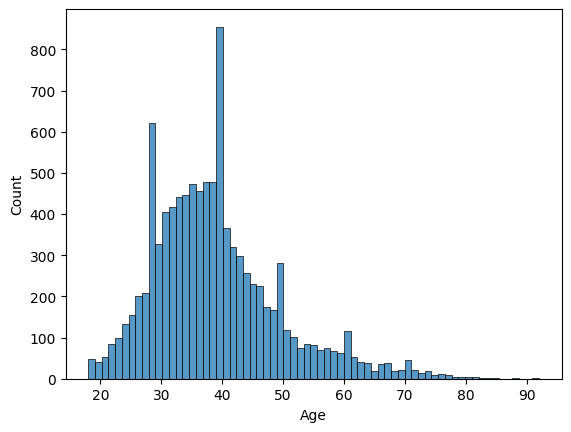

In [50]:
sns.histplot(df.Age)

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

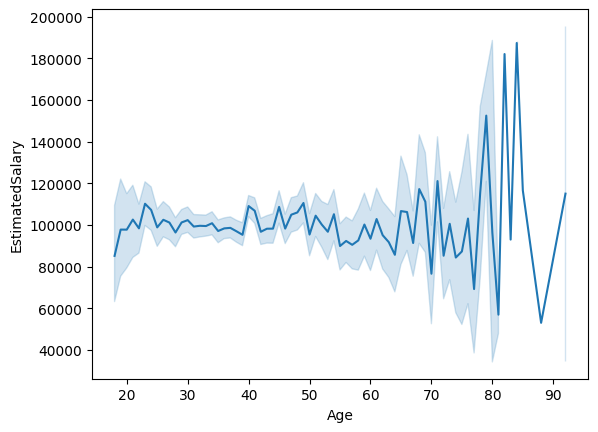

In [54]:
sns.lineplot(data=df,x='Age',y='EstimatedSalary')

<Axes: ylabel='EstimatedSalary'>

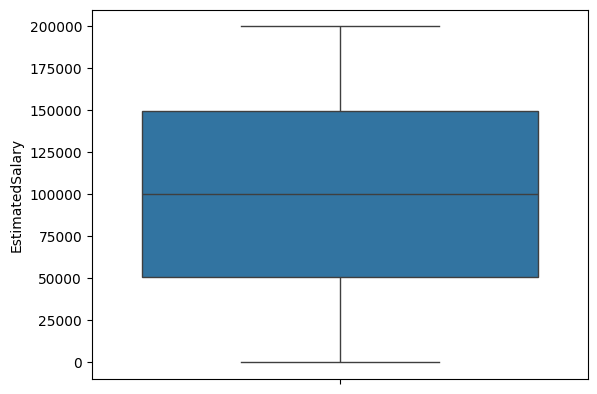

In [11]:
sns.boxplot(data=df,y='EstimatedSalary')

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='CreditScore'>

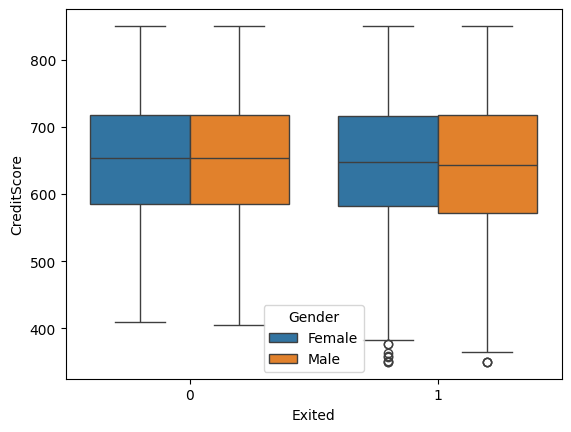

In [13]:
sns.boxplot(data=df,x='Exited',y='CreditScore',hue='Gender')

In [14]:
# df.pivot_table('Gender',['Exited'])

In [15]:
df0=df[df['Exited']==0]
df1=df[df['Exited']==1]


In [16]:
df0.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


<Axes: ylabel='CreditScore'>

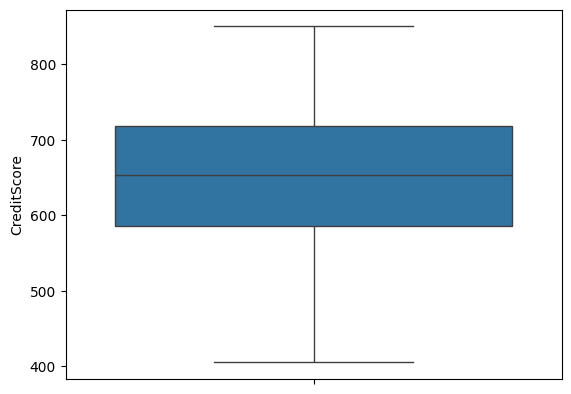

In [17]:
sns.boxplot(data=df0,y='CreditScore')

<Axes: ylabel='CreditScore'>

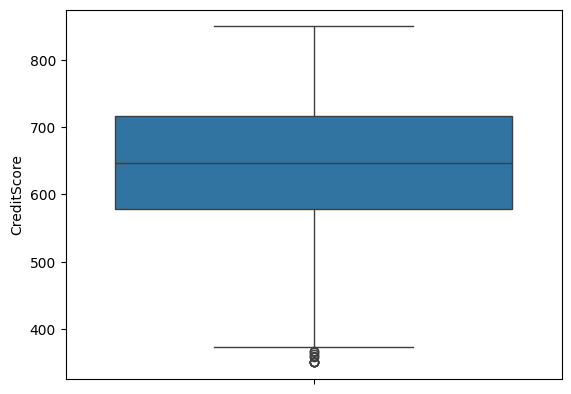

In [18]:
sns.boxplot(data=df1,y='CreditScore')

<Axes: xlabel='Exited', ylabel='CreditScore'>

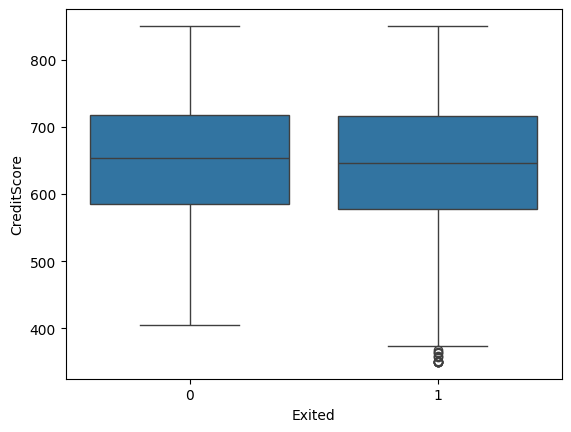

In [19]:
sns.boxplot(data=df,x='Exited',y='CreditScore')

In [20]:
sort_cred=df.sort_values(by='CreditScore')
bot_cred=sort_cred[0:1000]
bot_cred

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
8723,8724,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
9624,9625,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1
8762,8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,1419,15649280,Lucchese,521,Germany,Female,40,9,134504.78,1,1,0,18082.06,0
5651,5652,15766272,Folliero,521,Germany,Female,61,0,125193.96,1,1,1,109356.53,0
9894,9895,15704795,Vagin,521,France,Female,77,6,0.00,2,1,1,49054.10,0
1279,1280,15634896,Grant,521,France,Female,39,6,0.00,2,0,1,27375.15,0


In [21]:
bot_cred['Exited'].value_counts()

Exited
0    777
1    223
Name: count, dtype: int64

In [22]:
#Other method-
np.percentile(df['CreditScore'],10)

np.float64(521.0)

<!-- Other method- -->


In [23]:
df[df['CreditScore']<521]['Exited'].value_counts()

Exited
0    757
1    219
Name: count, dtype: int64

In [24]:
757+219

976

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_19764\3221049788.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,y='Exited',hue='Gender',ci=None)


<Axes: ylabel='Exited'>

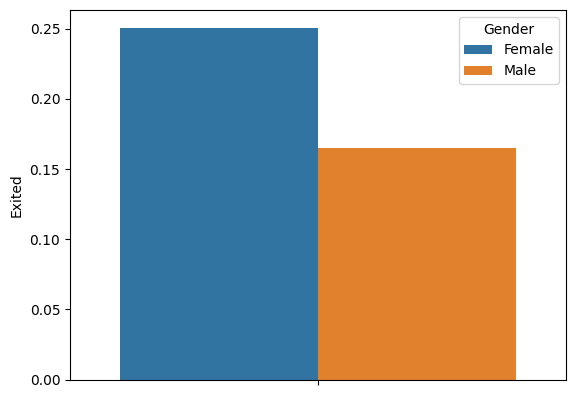

In [25]:
sns.barplot(data=df,y='Exited',hue='Gender',ci=None)

In [26]:
tbl=pd.crosstab(df.Gender,df.Exited)
tbl

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [27]:
# Percentage of females exiting-
print(1139/(3404+1139))

# Percentage of males exiting-
print(898/(4559+898))


0.2507153863086066
0.16455928165658787


<Axes: xlabel='Gender'>

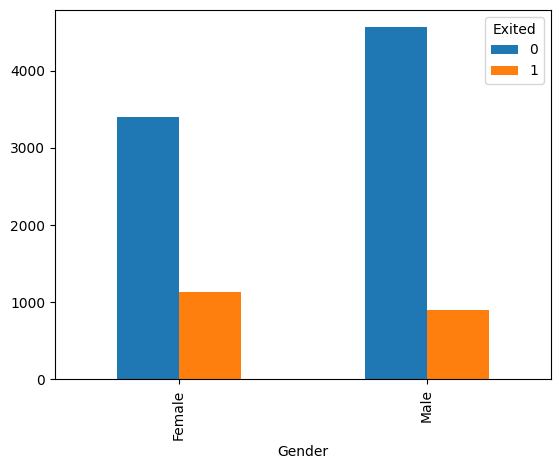

In [28]:
tbl.plot(kind='bar')

In [29]:
tbl2=pd.crosstab(df.Geography,df.Exited)
tbl2

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [30]:
tbl2['prop']=tbl2[1]/(tbl2[0]+tbl2[1])

In [31]:
tbl2

Exited,0,1,prop
Geography,,,
France,4204,810,0.161548
Germany,1695,814,0.324432
Spain,2064,413,0.166734


In [32]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [33]:
# %of germany -

2509/(5014+2509+2477)

0.2509

<Axes: xlabel='Geography'>

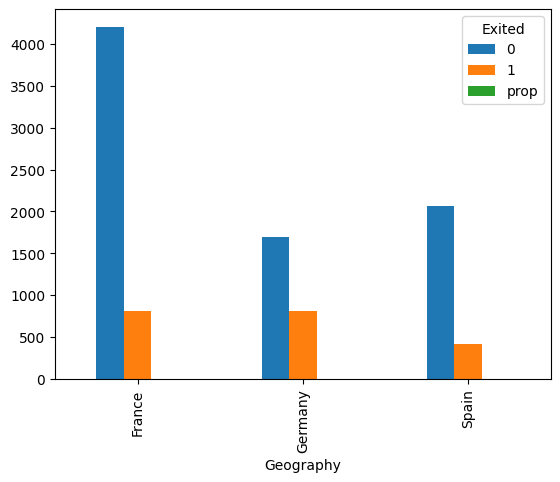

In [34]:
tbl2.plot(kind='bar')

In [35]:
#Around 50% of them have exited in germany

In [36]:
tbl4=pd.crosstab(df.Geography,df.Gender,values=df.Exited,aggfunc='sum')
tbl4
tbl4['propfemoerc']=tbl4['Female']/(tbl4['Female']+tbl4['Male'])
tbl4  #the percentage of females exiting in every country is nearly the same - around 0.55

Gender,Female,Male,propfemoerc
Geography,,,
France,460,350,0.567901
Germany,448,366,0.550369
Spain,231,182,0.559322


<Axes: xlabel='Geography'>

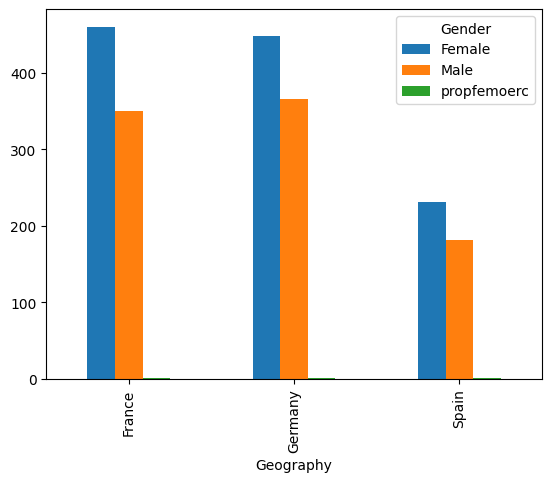

In [37]:
tbl4.plot(kind='bar')

In [38]:
tbl3=pd.crosstab([df.Gender,df.Geography],df['Exited'])
tbl3

Exited               0    1
Gender Geography           
Female France     1801  460
       Germany     745  448
       Spain       858  231
Male   France     2403  350
       Germany     950  366
       Spain      1206  182

In [39]:
tbl3['prop']=tbl3[1]/(tbl3[0]+tbl3[1])
tbl3

Exited               0    1      prop
Gender Geography                     
Female France     1801  460  0.203450
       Germany     745  448  0.375524
       Spain       858  231  0.212121
Male   France     2403  350  0.127134
       Germany     950  366  0.278116
       Spain      1206  182  0.131124

<Axes: xlabel='Gender,Geography'>

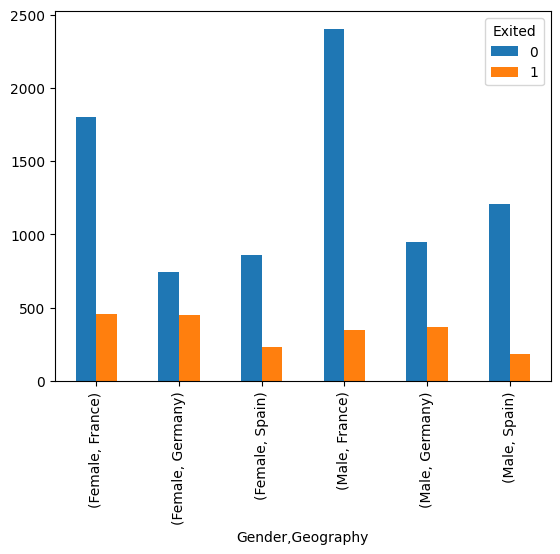

In [40]:
tbl3.plot(kind='bar',y=[0,1])

<Axes: xlabel='Gender,Geography'>

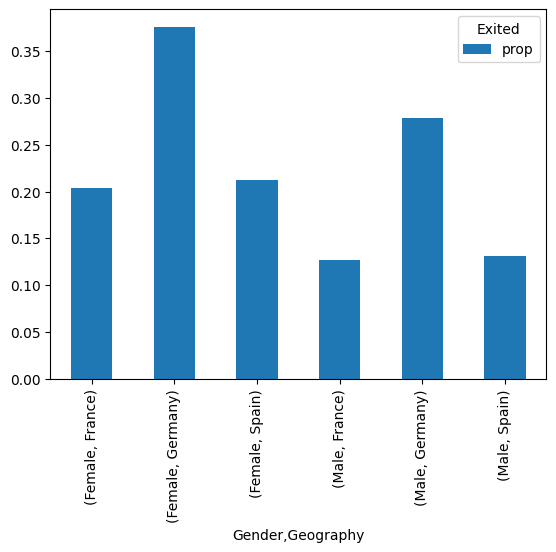

In [41]:
tbl3.plot(kind='bar',y=['prop'])  #proportion of total females in germany who have exited is very high

(array([ 565., 2012., 3156., 1309.,  381.,  254.,  150.,  113.,   19.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

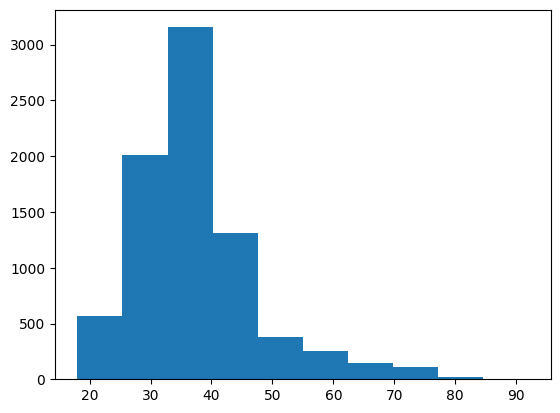

In [42]:
plt.hist(df0['Age'])

(array([ 40., 141., 281., 531., 481., 357., 163.,  32.,  10.,   1.]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

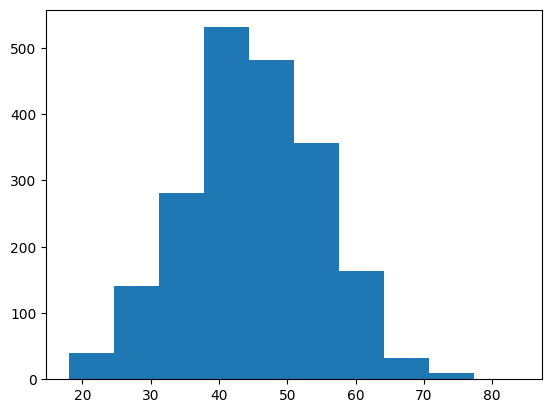

In [43]:
plt.hist(df1['Age'])

As the value of corr. coeff goes to 1, the strength of the relationship increases.(direct proportionality) <br>
As the value of corr. coeff goes to 0, the strength of the relationship decreases. <br>
As the value of corr. coeff goes to closer to -1, the strength of the relationship increases but in the opposite direction(inverse). <br>


correlation coefficient is only used for continuous variables. It is done only between two continuous variables.

In [44]:
new_df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='stackloss')
new_df.head()

,AirFlow,WaterTemp,AcidConc,StackLoss
0,80,27,89,42
1,80,27,88,37
2,75,25,90,37
3,62,24,87,28
4,62,22,87,18


In [45]:
new_df.corr()  #here all the four variables are continuous data

,AirFlow,WaterTemp,AcidConc,StackLoss
AirFlow,1.000000,0.781852,0.500143,0.919663
WaterTemp,0.781852,1.000000,0.390940,0.875504
AcidConc,0.500143,0.390940,1.000000,0.399830
StackLoss,0.919663,0.875504,0.399830,1.000000


<Axes: >

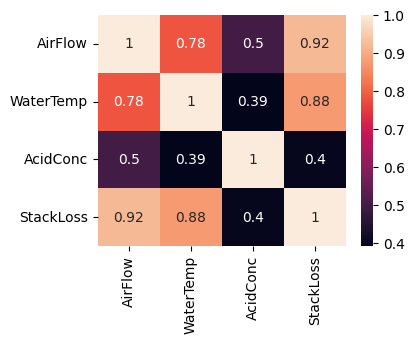

In [46]:
plt.figure(figsize=(4,3))
sns.heatmap(new_df.corr(),annot=True)